<a href="https://colab.research.google.com/github/noahbyang/MIS515_Fall2024/blob/main/Group_11_Project_2_RemoteWork%26MentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health/data


# **Import Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Impact_of_Remote_Work_on_Mental_Health.csv to Impact_of_Remote_Work_on_Mental_Health.csv


# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

# **Display Dataset**

In [ ]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


# **Data Cleaning**

In [ ]:
#Checking for duplicates
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
#drop Employee_ID
df = df.drop("Employee_ID", axis=1)

Number of duplicate rows: 0


In [ ]:
#Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [ ]:
#Handling missing values
df["Physical_Activity"] = df["Physical_Activity"].fillna("None")
df["Mental_Health_Condition"] = df["Mental_Health_Condition"].fillna("None")
print(df.isnull().sum())

Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


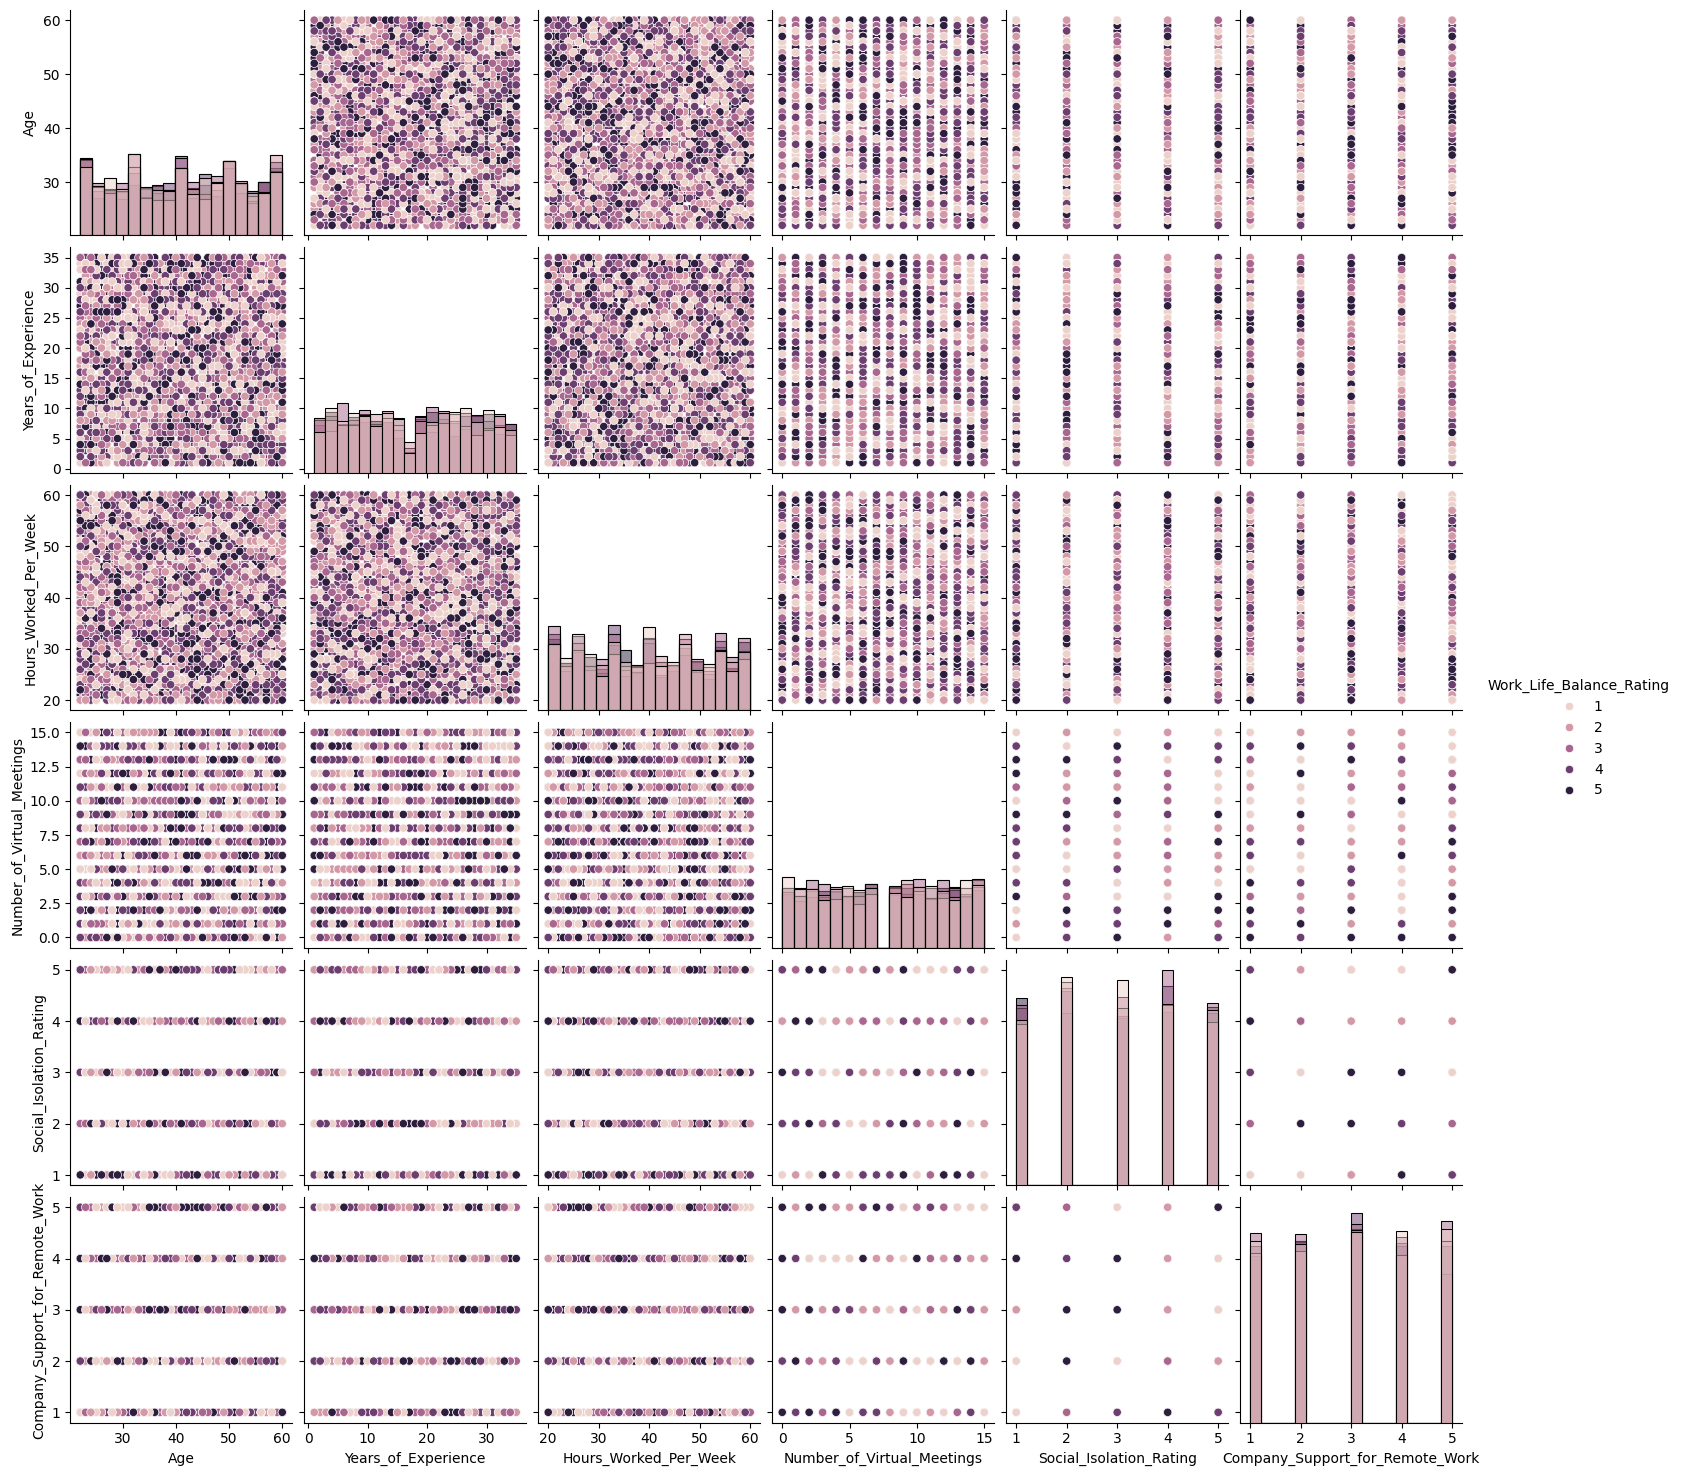

In [ ]:
#create pair plot to check for Outliers
sns.pairplot(df, hue="Work_Life_Balance_Rating", diag_kind="hist")
plt.show()

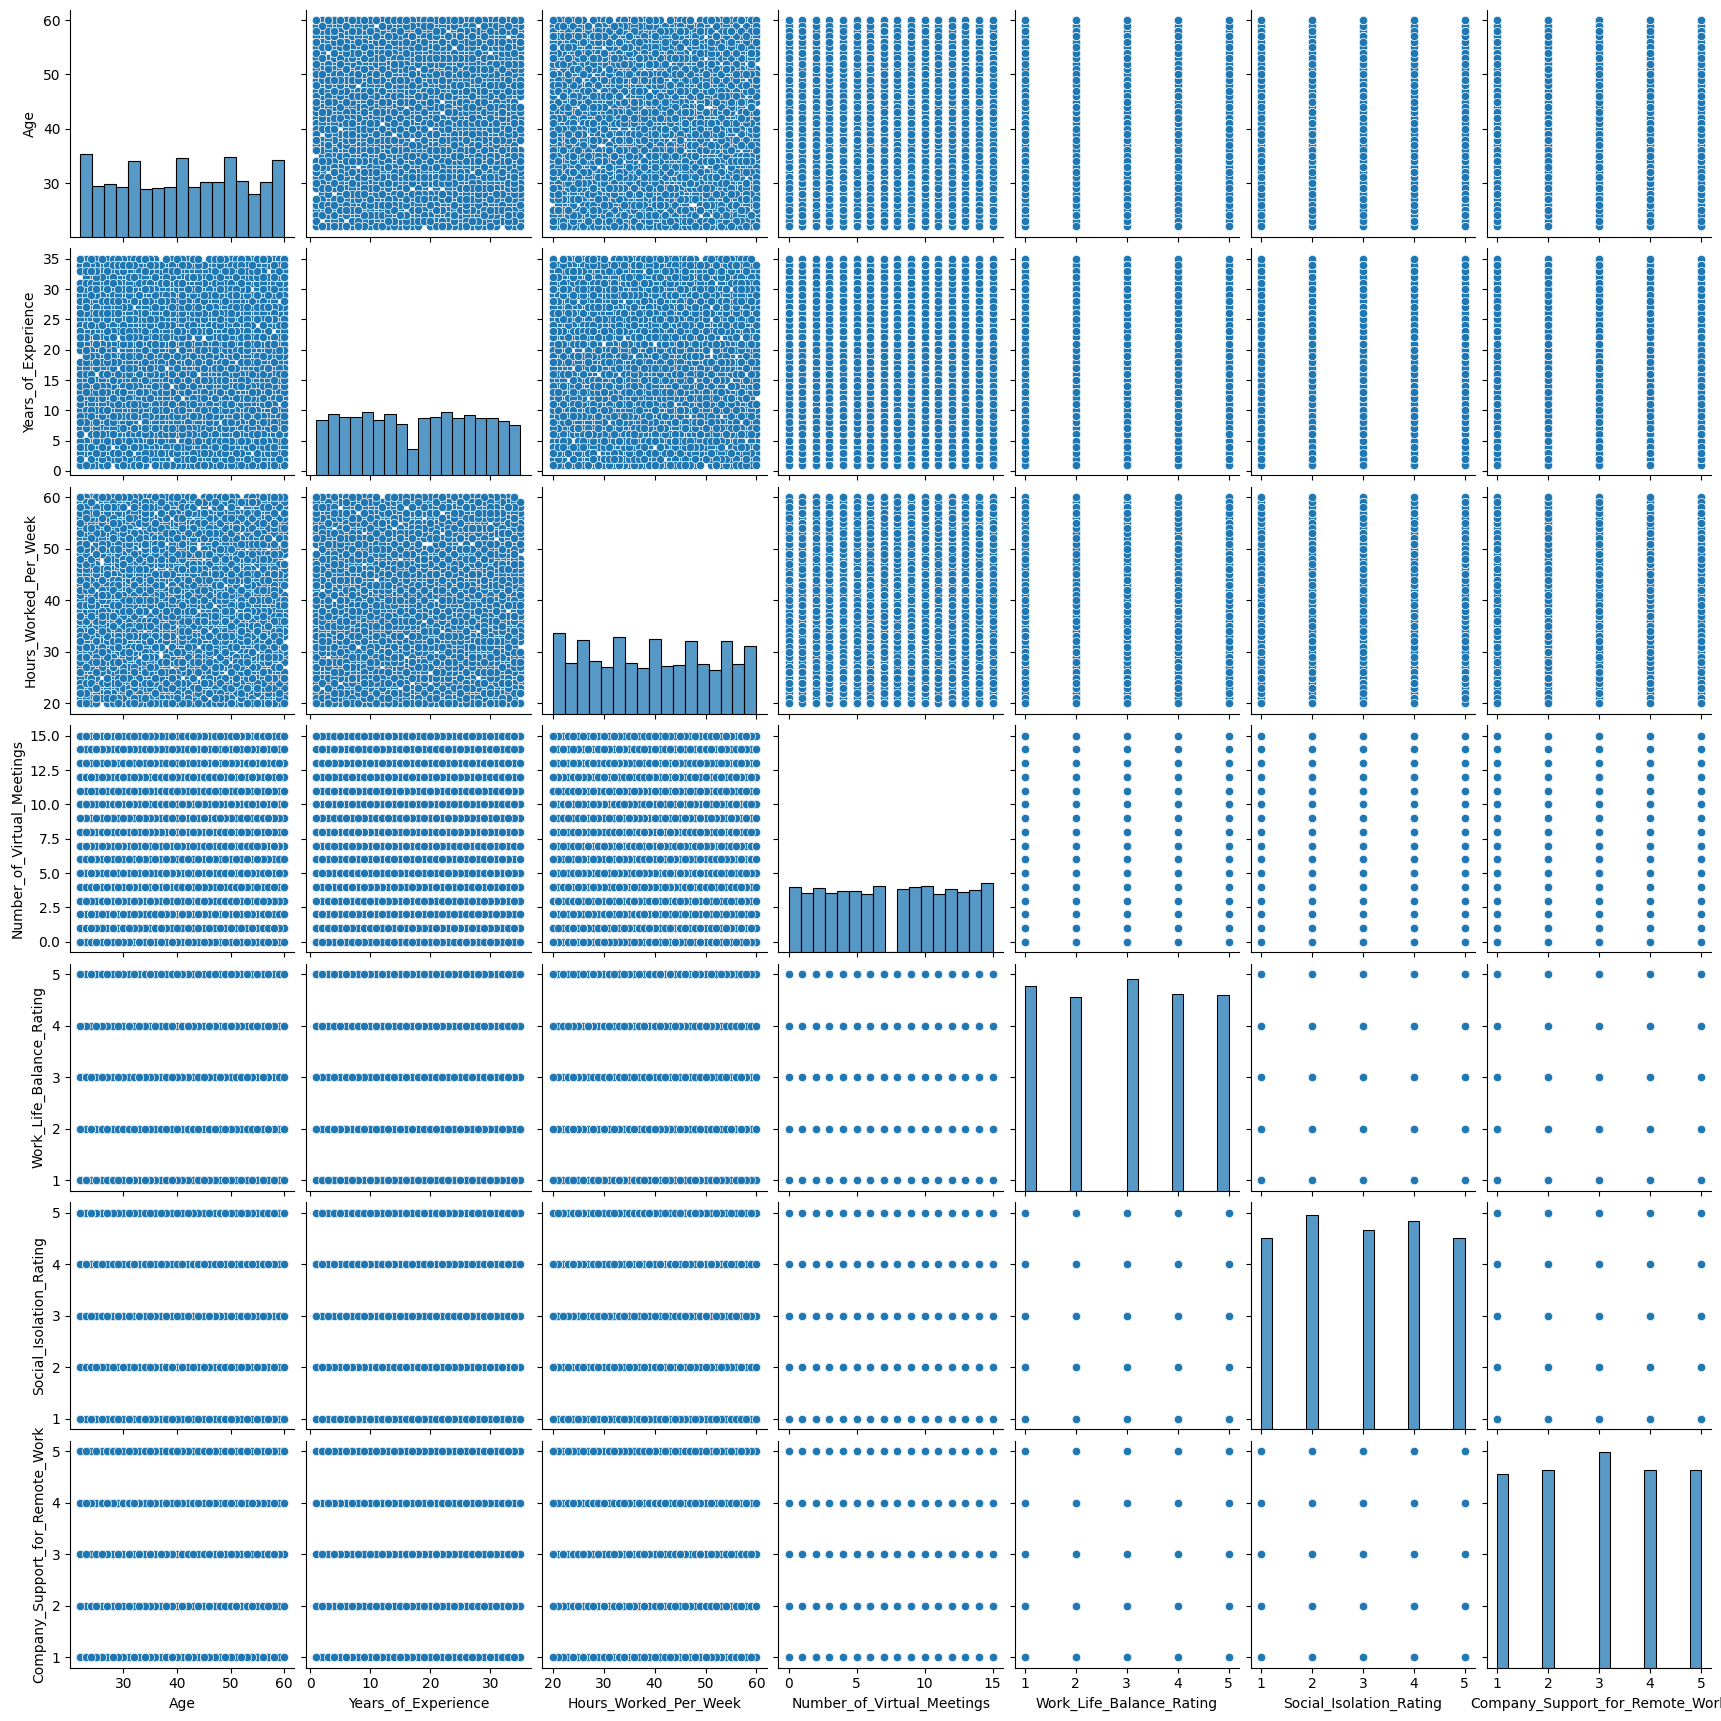

In [ ]:
#create pair plot to check for outliers
sns.pairplot(df, diag_kind="hist")
plt.show()

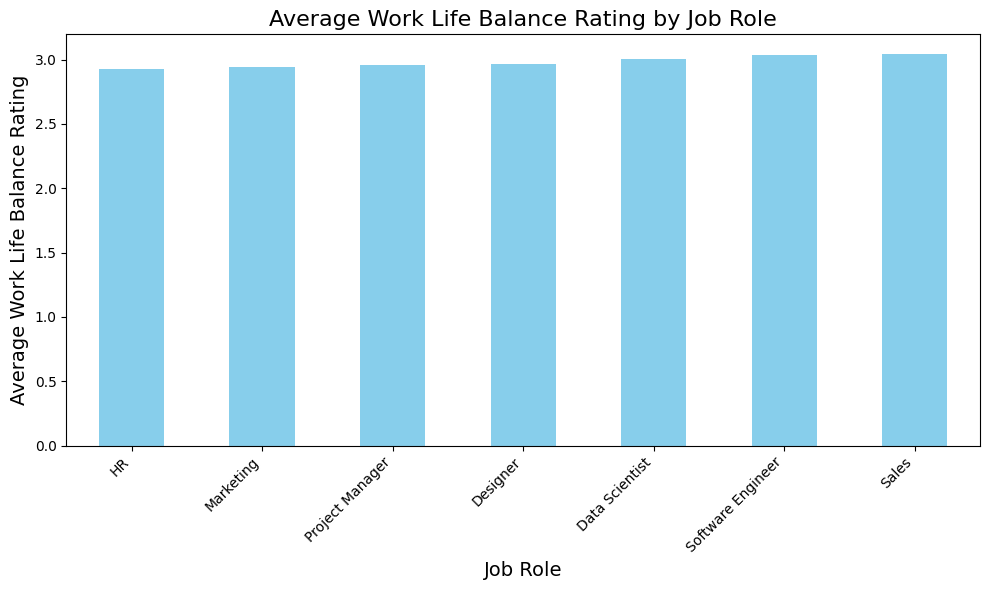

In [ ]:
#group average wlb rating by job role
avg_rating_by_job = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean().sort_values()

#create bar chart
plt.figure(figsize=(10, 6))
avg_rating_by_job.plot(kind='bar', color='skyblue')

#add title, and x & y labels
plt.title('Average Work Life Balance Rating by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Average Work Life Balance Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')

# display chart
plt.tight_layout()
plt.show()

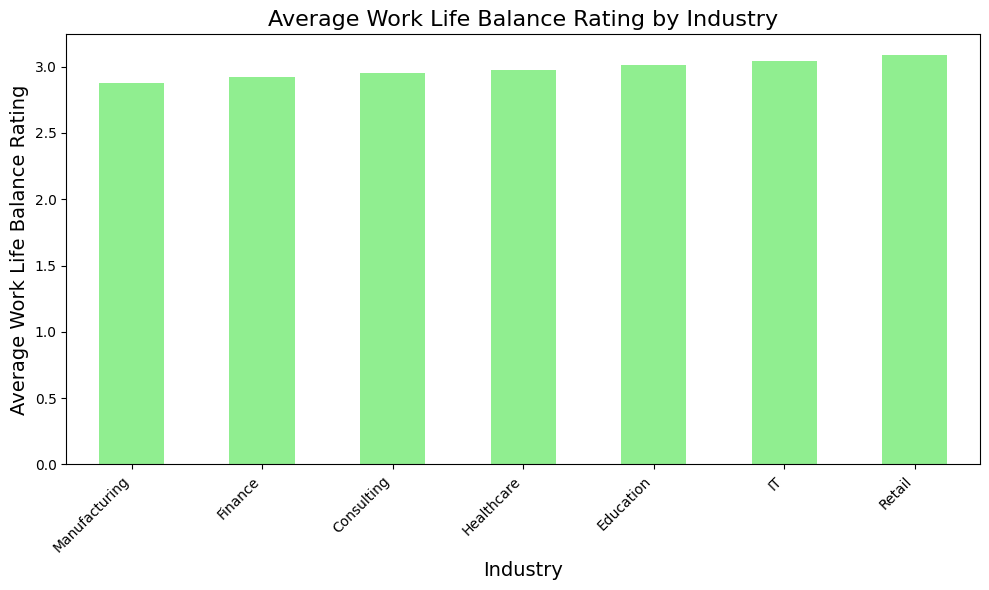

In [ ]:
#group average wlb rating by industry
avg_rating_by_industry = df.groupby('Industry')['Work_Life_Balance_Rating'].mean().sort_values()

#create bar chart
plt.figure(figsize=(10, 6))
avg_rating_by_industry.plot(kind='bar', color='lightgreen')

#add title, and x & y labels
plt.title('Average Work Life Balance Rating by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Work Life Balance Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')

# display chart
plt.tight_layout()
plt.show()

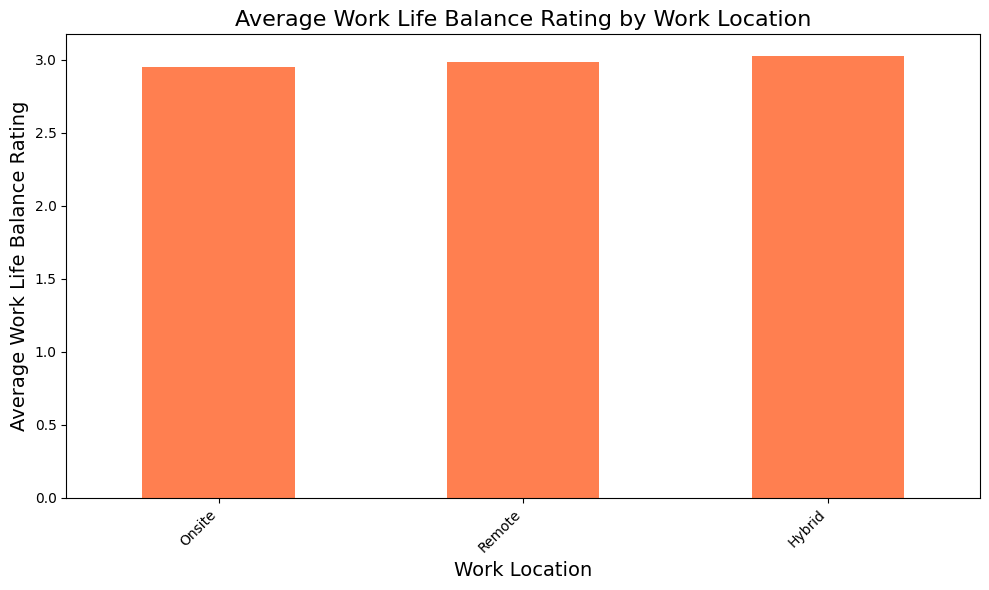

In [ ]:
# group by work location and avg wlb rating
avg_rating_by_work_location = df.groupby('Work_Location')['Work_Life_Balance_Rating'].mean().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
avg_rating_by_work_location.plot(kind='bar', color='coral')

# Add labels and title
plt.title('Average Work Life Balance Rating by Work Location', fontsize=16)
plt.xlabel('Work Location', fontsize=14)
plt.ylabel('Average Work Life Balance Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# **Machine Learning Model**

In [ ]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Convert Categories to Numerical Values
df['Physical_Activity'] = df['Physical_Activity'].map({'None': 0, 'Weekly': 1, 'Daily': 2})
df['Sleep_Quality'] = df['Sleep_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Access_to_Mental_Health_Resources'] = df['Access_to_Mental_Health_Resources'].map({'No': 0, 'Yes': 1})
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].map({'None': 0, 'Anxiety': 1, 'Depression': 2, 'Burnout': 3})
df['Work_Location'] = df['Work_Location'].map({'Onsite': 0, 'Hybrid': 1, 'Remote': 2})

# Handle missing data
df.fillna(0, inplace=True)

# Convert categorical data to numeric
x = df[['Physical_Activity', 'Sleep_Quality', 'Access_to_Mental_Health_Resources',
         'Hours_Worked_Per_Week', 'Work_Location']]

# Check if any columns still contain non-numeric data
if x.select_dtypes(include=['object']).any().any():
    print("Warning: Non-numeric data found in feature columns.")

# Convert to numeric
x = x.apply(pd.to_numeric, errors='coerce')

# Target variable
y = df['Mental_Health_Condition']

# Partition the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Construct a regression tree from the training data
clf = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_features=3, bootstrap=True, random_state=1001)
model = clf.fit(X_train, y_train)

# Test the regression tree
pred = clf.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, pred)**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.2885522825606497


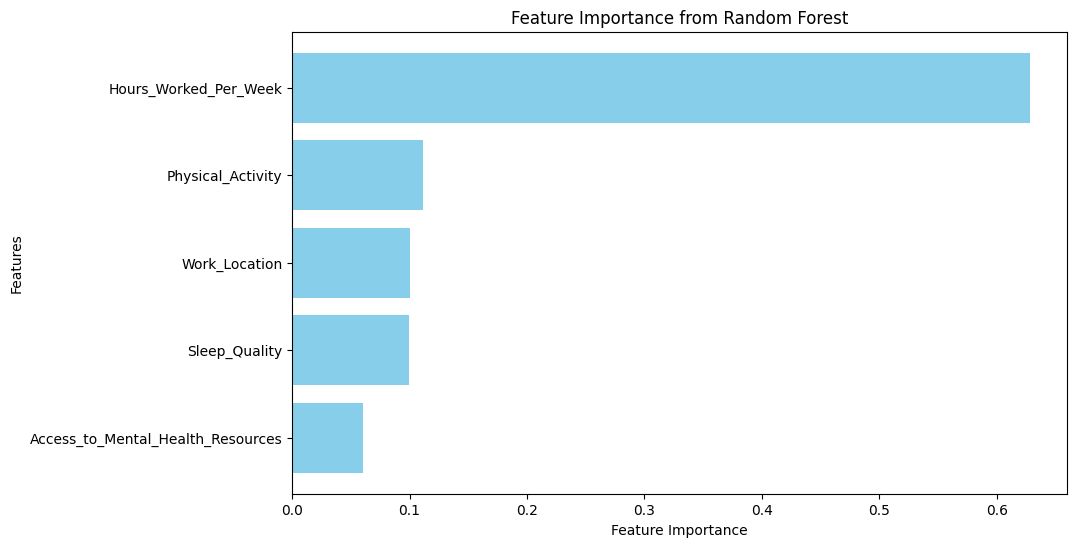

In [ ]:
# get feature importances
feature_importances = clf.feature_importances_
feature_names = x.columns

# Sort the features
sorted_indices = feature_importances.argsort()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], color='skyblue')
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

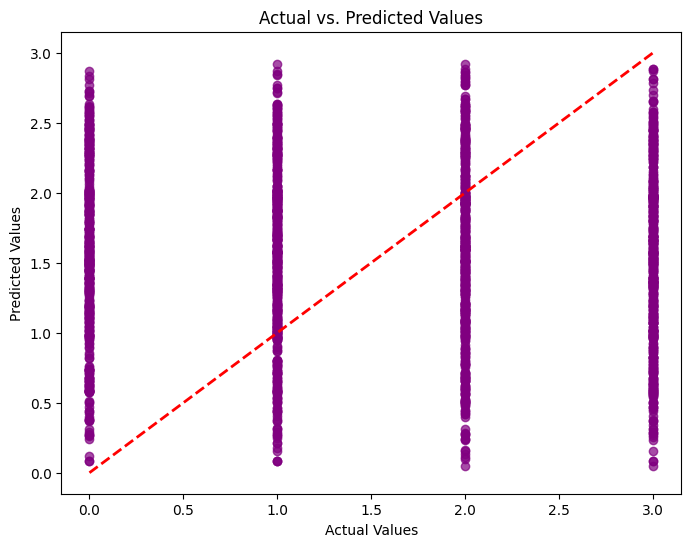

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()



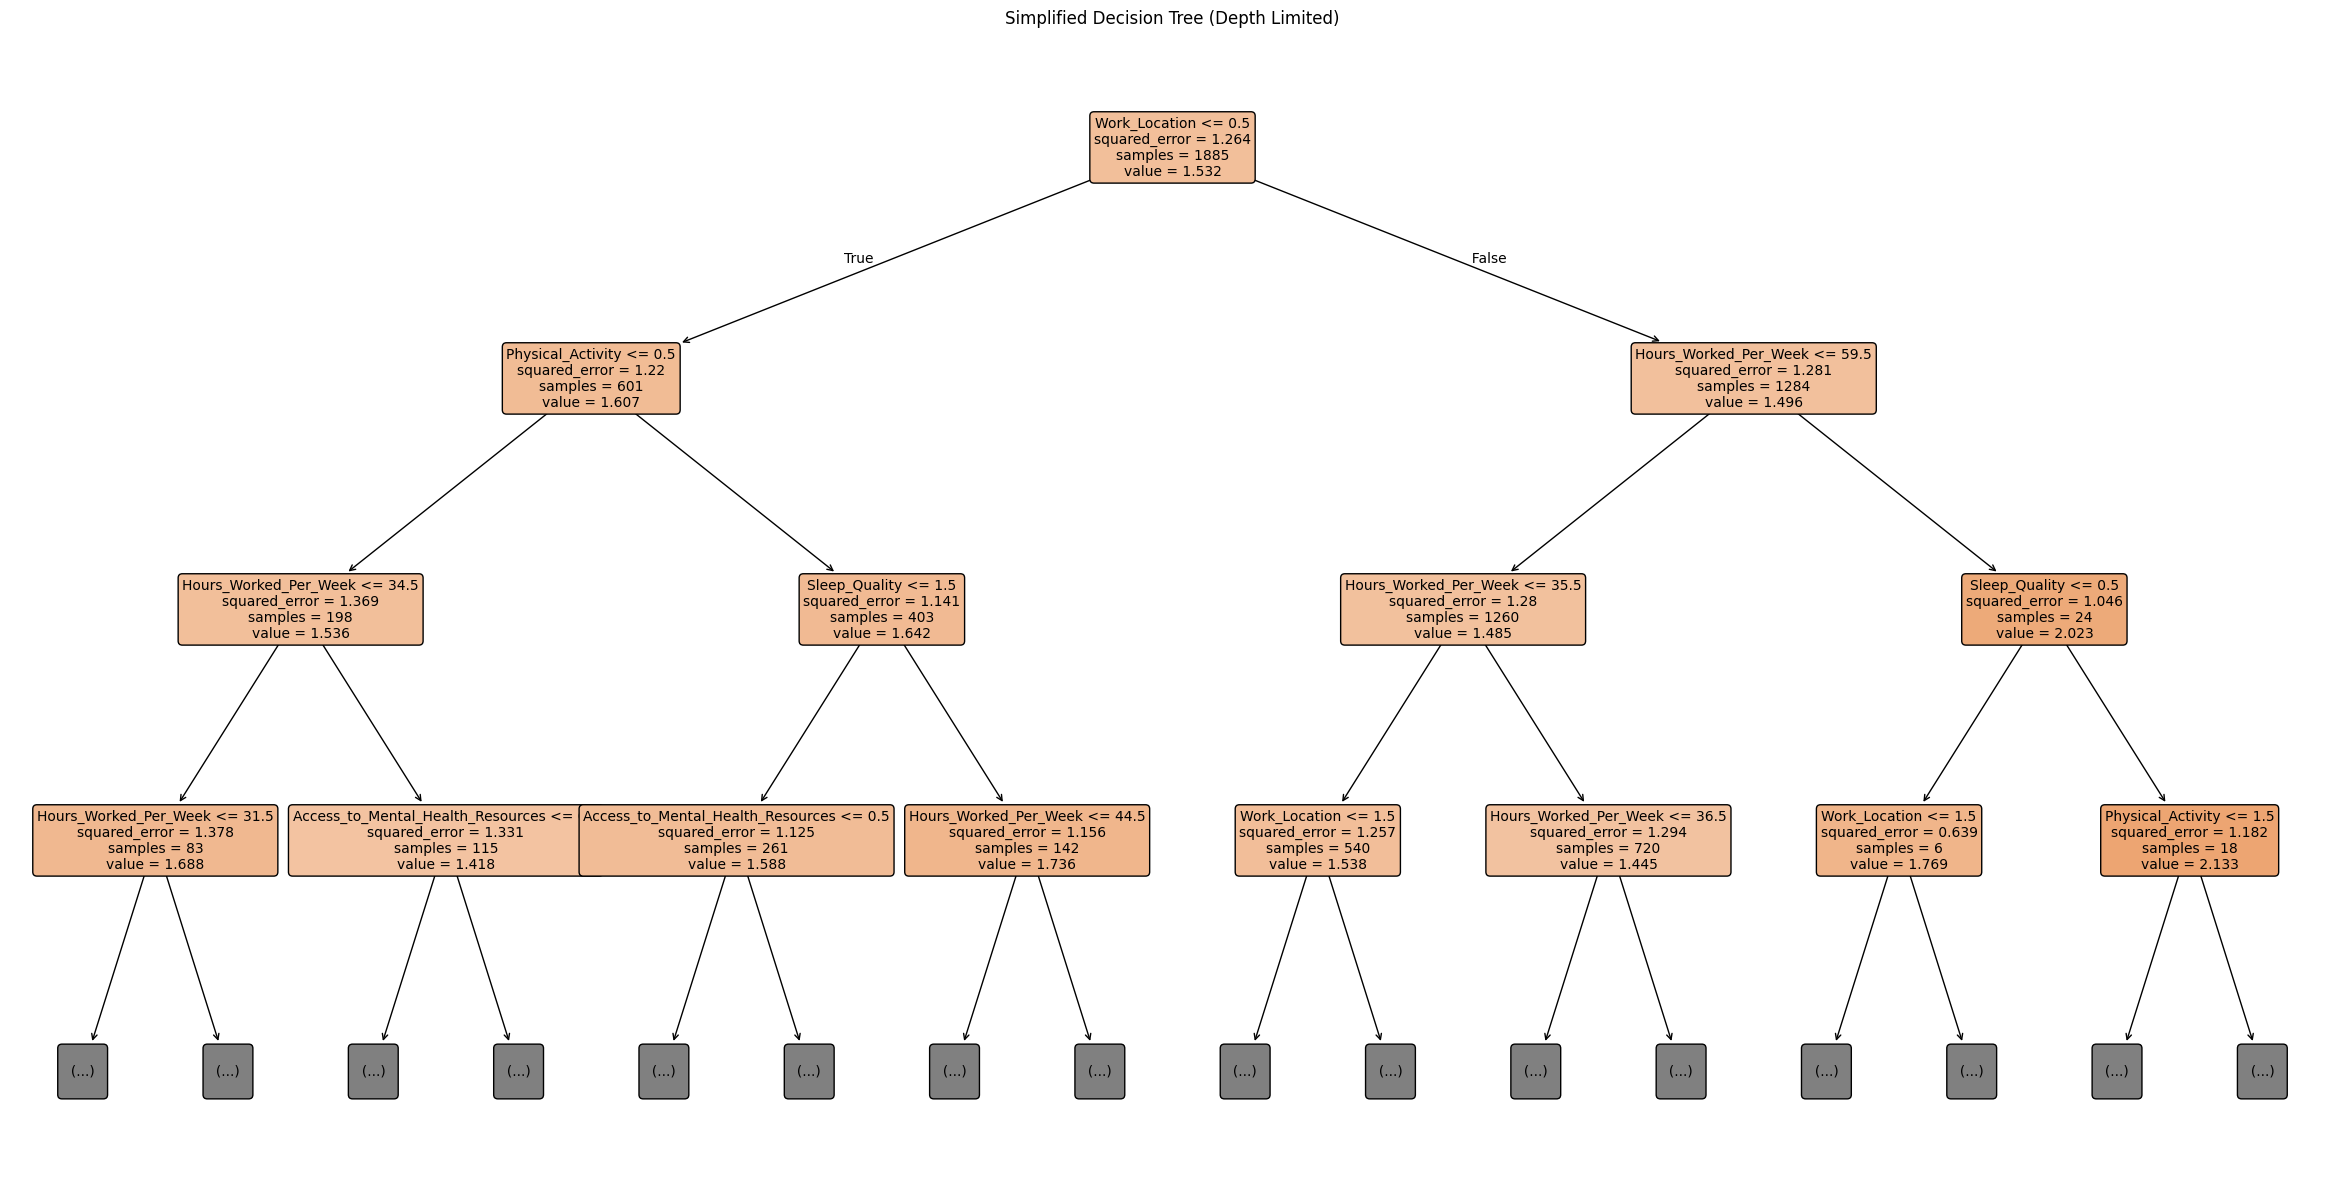

In [ ]:
from sklearn.tree import plot_tree


# Extract a single tree
single_tree = clf.estimators_[0]

# Plot the tree
plt.figure(figsize=(30, 15))
plot_tree(single_tree, feature_names=x.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Simplified Decision Tree (Depth Limited)")
plt.show()

**Multiple Linear Regression**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['Age', 'Gender', 'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week']
target = 'Work_Life_Balance_Rating'

X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Work_Location'])
    ]
)

# Create MLR model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 2.02
R-squared (R2): 0.00


**Logistic regression - Predicting Work Life Balance Rating**

In [ ]:
#Convert Work_Life_Balance_Rating
df['Work_Life_Balance_Rating_Updated'] = df['Work_Life_Balance_Rating'].apply(lambda x: 1 if x >= 4 else 0)
df['Work_Life_Balance_Rating_Updated'].value_counts()

,count
Work_Life_Balance_Rating_Updated,
0,1027
1,687


In [ ]:
#Select features and target
features = ['Age', 'Gender', 'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week']
target = 'Work_Life_Balance_Rating_Updated'

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Work_Location'])
    ]
)

#Create logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

#Train the model
model.fit(X_train, y_train)

#Predictions on the test set
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#Reformatting
formatted_report = classification_report(y_test, y_pred, target_names=["Poor", "Good"])
formatted = f"""
Classification Report:
{formatted_report}

Overall Accuracy: {accuracy:.2f}
"""
print(formatted)



Classification Report:
              precision    recall  f1-score   support

        Poor       0.63      0.59      0.61       206
        Good       0.43      0.47      0.45       137

    accuracy                           0.54       343
   macro avg       0.53      0.53      0.53       343
weighted avg       0.55      0.54      0.54       343


Overall Accuracy: 0.54



**Confusion Matrix Graph**

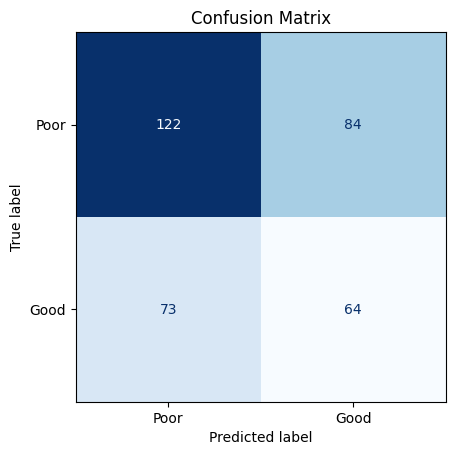

In [ ]:
#Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=["Poor", "Good"], cmap=plt.cm.Blues, colorbar=False)
plt.title("Confusion Matrix")
plt.show()

**Class Distribution Bar Chart**

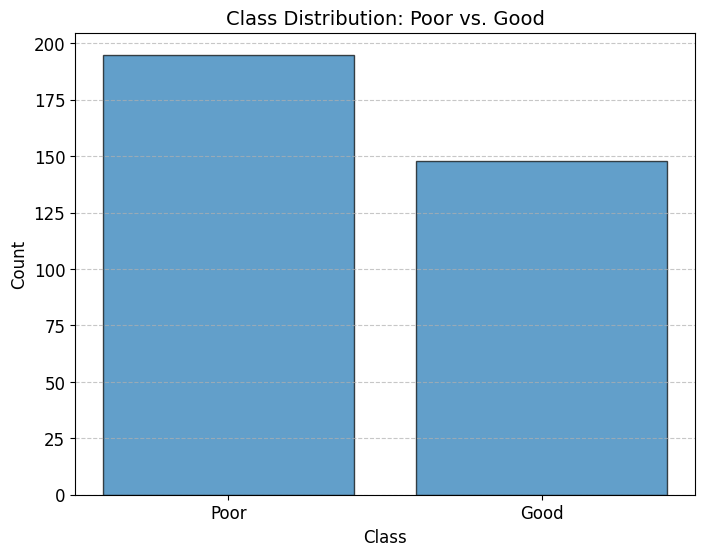

In [ ]:
#Data for class distribution
class_counts = {'Poor': 195, 'Good': 148}
classes = list(class_counts.keys())
counts = list(class_counts.values())

#Create a bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, alpha=0.7, edgecolor='black')
plt.title('Class Distribution: Poor vs. Good', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

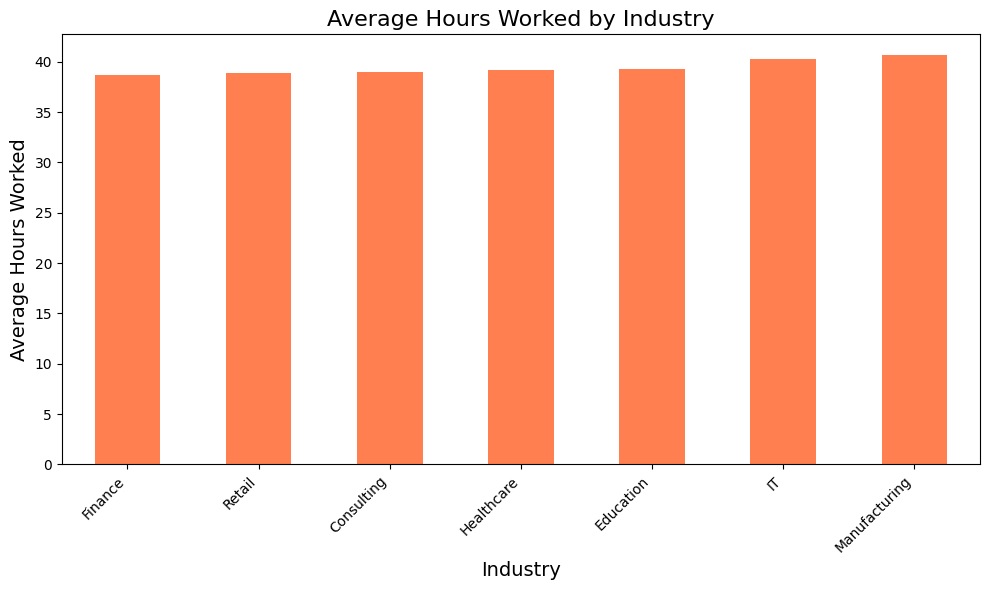

In [ ]:
# Create a new plot for Average Stress Level by Industry
avg_stress_by_industry = df.groupby('Industry')['Hours_Worked_Per_Week'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_stress_by_industry.plot(kind='bar', color='coral')

plt.title('Average Hours Worked by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Hours Worked', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()